## Feature selection. kap 6.5
Copied from: https://xavierbourretsicotte.github.io/subset_selection.html
### 6.5.1
Import data and remove rows whith 'nan' in salery column

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

# Import hitters data
pdData = pd.read_csv("hitters.csv")

# Removed values with 'NaN' in Salary
pdData = pdData[pdData['Salary'].notna()]
pdData.head(3)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N


#### Removing non-integer columns
Removes columns with letters

In [2]:
credit = pdData.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)
credit.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0


#### Helper function (copied)
Returns the RSS and R2 error from a fit

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

### Selecting best subsections
Sets Y = salary and removes it from X.
This iterates throug all combinations of columns in X and makes a linar fit to Y.

In [6]:
# Importing tqdm for the progress bar
import itertools
from tqdm import tnrange, tqdm_notebook

# Makes Y=Salary since this is the variable we wish to estimate, removes Salary from training data =X
Y = credit.Salary
X = credit.drop(columns = 'Salary', axis = 1)
# We have k=16 since we have 16columns with data
k = 16
# Lists for error-score and number of features evaluated
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []


# This line is for the progress of k (util for progress bar)
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):
    #Looping over all possible combinations:
    for combo in itertools.combinations(X.columns,k):   # Loopin through all combinations
        tmp_result = fit_linear_reg(X[list(combo)],Y)   # Use helper function and saving RSS & R2 into tmp
        RSS_list.append(tmp_result[0])                  # fill RSS list from tmp
        R_squared_list.append(tmp_result[1])            # fill R2 list from tmp
        feature_list.append(combo)                      # fill feature list with the used combo of features
        numb_features.append(len(combo))                # note numbers of features used

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [7]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
#display(df_min.head(3))
display(df_max.head(3))
display(df_max.iloc[5:8])
#display(df_min.tail(3))
display(df_max.tail(3))

,numb_features,RSS,R_squared,features
11,1,3.617968e+07,0.321450,"(CRBI,)"
40,2,3.064656e+07,0.425224,"(Hits, CRBI)"
323,3,2.924930e+07,0.451429,"(Hits, CRBI, PutOuts)"


,numb_features,RSS,R_squared,features
7659,6,2.680370e+07,0.497297,"(AtBat, Hits, Walks, CRuns, CWalks, PutOuts)"
16611,7,2.603404e+07,0.511732,"(AtBat, Hits, Walks, CHmRun, CRuns, CWalks, Pu..."
29054,8,2.565678e+07,0.518807,"(AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal..."


,numb_features,RSS,R_squared,features
65460,14,2.517145e+07,0.527909,"(AtBat, Hits, HmRun, Runs, Walks, Years, CAtBa..."
65529,15,2.517032e+07,0.527931,"(AtBat, Hits, HmRun, Runs, Walks, Years, CAtBa..."
65534,16,2.517031e+07,0.527931,"(AtBat, Hits, HmRun, Runs, RBI, Walks, Years, ..."


In [8]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,4.500964e+07,0.155844,"(AtBat,)",3.617968e+07,0.32145
1,1,4.305862e+07,0.192436,"(Hits,)",3.617968e+07,0.32145
2,1,4.704515e+07,0.117668,"(HmRun,)",3.617968e+07,0.32145
3,1,4.391996e+07,0.176281,"(Runs,)",3.617968e+07,0.32145
4,1,4.254803e+07,0.202012,"(RBI,)",3.617968e+07,0.32145


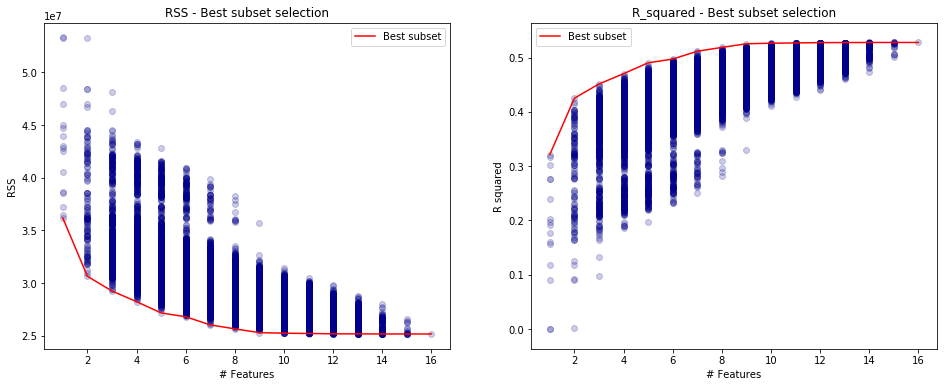

In [9]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

# Forward step selection

In [10]:
#Initialization variables
k = 16

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()
for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [11]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,k+1)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['CRBI'], 36179679.0),
 (2, ['CRBI', 'Hits'], 30646560.0),
 (3, ['CRBI', 'Hits', 'PutOuts'], 29249297.0),
 (4, ['CRBI', 'Hits', 'PutOuts', 'AtBat'], 28239364.0),
 (5, ['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks'], 27170423.0),
 (6, ['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks'], 26992202.0),
 (7,
  ['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns'],
  26142464.0),
 (8,
  ['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat'],
  25656777.0),
 (9,
  ['CRBI',
   'Hits',
   'PutOuts',
   'AtBat',
   'Walks',
   'CWalks',
   'CRuns',
   'CAtBat',
   'Assists'],
  25298875.0),
 (10,
  ['CRBI',
   'Hits',
   'PutOuts',
   'AtBat',
   'Walks',
   'CWalks',
   'CRuns',
   'CAtBat',
   'Assists',
   'Runs'],
  25244408.0),
 (11,
  ['CRBI',
   'Hits',
   'PutOuts',
   'AtBat',
   'Walks',
   'CWalks',
   'CRuns',
   'CAtBat',
   'Assists',
   'Runs',
   'Errors'],
  25210867.0),
 (12,
  ['CRBI',
   'Hits',
   'PutOuts',
   'AtBat',
   'Walks',
   'C

In [12]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [13]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[CRBI],3.617968e+07,0.321450,1,138327.906805,1.379415,1.392997,0.318850
2,"[CRBI, Hits]",3.064656e+07,0.425224,2,118052.016576,1.177223,1.204387,0.420802
3,"[CRBI, Hits, PutOuts]",2.924930e+07,0.451429,3,113501.815816,1.131848,1.172595,0.445075
4,"[CRBI, Hits, PutOuts, AtBat]",2.823936e+07,0.470371,4,110424.352650,1.101159,1.155488,0.462159
5,"[CRBI, Hits, PutOuts, AtBat, Walks]",2.717042e+07,0.490419,5,107122.526219,1.068233,1.136145,0.480505
6,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks]",2.699220e+07,0.493761,6,107207.466869,1.069080,1.150574,0.481896
7,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",2.614246e+07,0.509698,7,104739.107558,1.044465,1.139542,0.496239
8,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",2.565678e+07,0.518807,8,103654.975136,1.033654,1.142313,0.503651
9,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",2.529887e+07,0.525520,9,103056.718661,1.027688,1.149929,0.508641
10,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",2.524441e+07,0.526541,10,103612.207388,1.033228,1.169051,0.507753


In [14]:
print("Best R_squared_adj:")
print("Index:",df1['R_squared_adj'].idxmax(), "=", df1['R_squared_adj'].max())

Best R_squared_adj:
Index: 9 = 0.5086408324706607


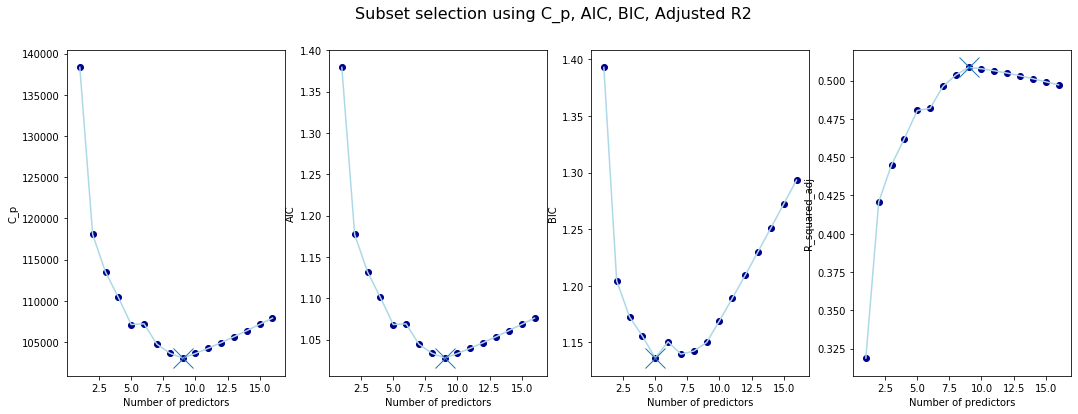

In [15]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()